## Thompson sampling algorithm

In [9]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# importing the dataset
data = pd.read_csv('Ads_CTR_Optimisation.csv')

In [11]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [12]:
# Implementing Thompson Sampling
import random
N = 800
d = 10
ads_selected = []
number_of_rewards_1 = [0]*d
number_of_rewards_0 = [0]*d
total_rewards = 0

for n in range (0, N):
    ad = 0
    max_random = 0
    for i in range (0, d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
        
        ads_selected.append(ad)
        reward = data.values[n, ad]
        if reward == 1:
            number_of_rewards_1[ad] += 1
        elif reward == 0:
            number_of_rewards_0[ad] += 1
        
        total_rewards += reward

Text(0, 0.5, 'Number of times the ad was selected')

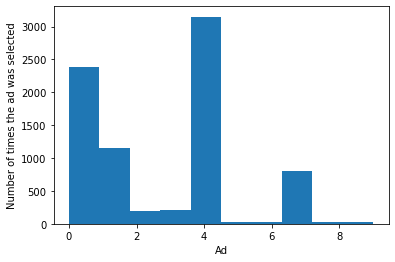

In [13]:
# Now we have to visualize the results
plt.hist(ads_selected)
plt.xlabel('Ad')
plt.ylabel('Number of times the ad was selected')

### Hence, it can be interpreted that ad 4 has the greatest impact
When we experiment with different values of d, it has been found that it is best to select a value between 800-10000 so as the algorithm to give accurate results. Below 800, the results are skewed.